In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

from scipy.io import loadmat
from scipy.optimize import minimize

## Loading and Visualizing Data

Loading and Visualizing Data ...

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])
Theta1 : (25, 401)
Theta2 : (10, 26)

Training images : (5000, 400)
Training labels : (5000, 1)
Training Samples ... 



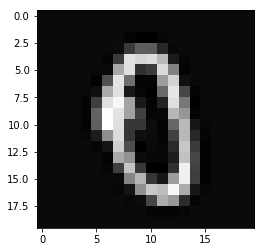

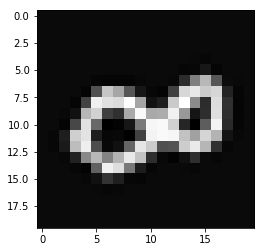

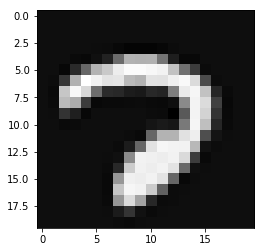

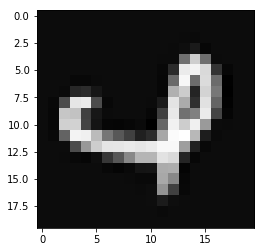

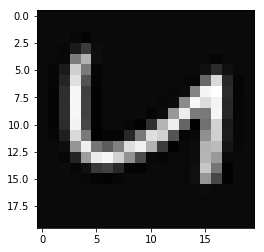

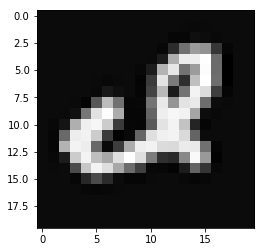

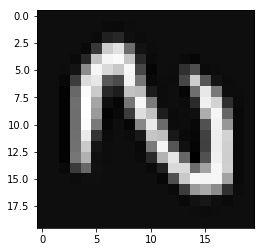

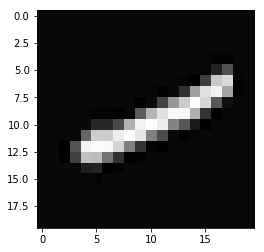

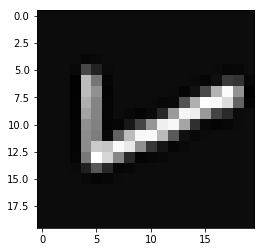

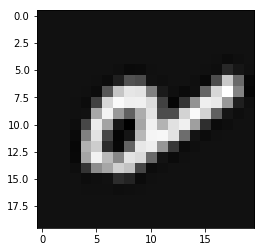

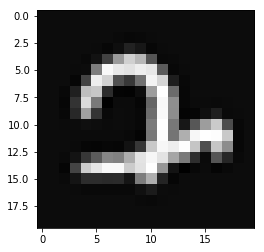

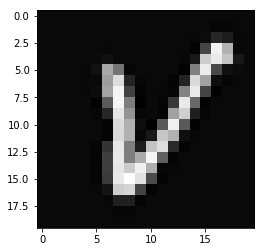

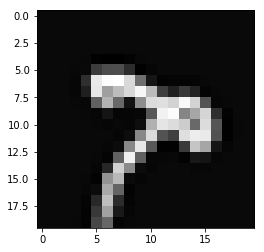

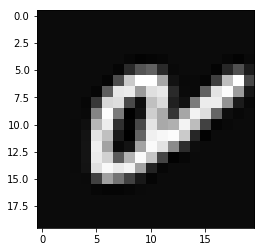

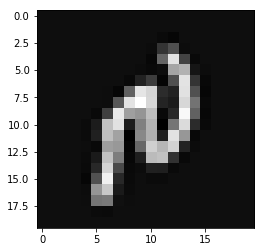

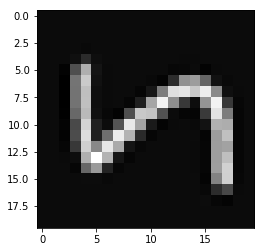

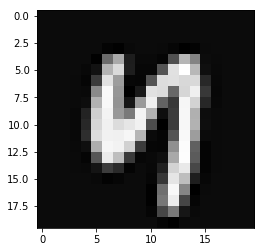

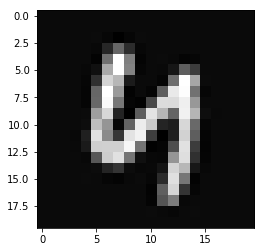

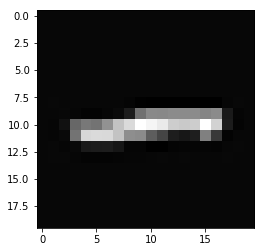

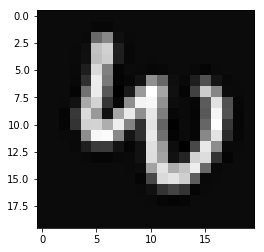

In [77]:
print("Loading and Visualizing Data ...\n")

data = loadmat('ex3data1.mat')
m = data['X'].shape

X = data['X']
y = data['y']

weights = loadmat('ex3weights.mat')

print(weights.keys())

Theta1, Theta2 = weights['Theta1'], weights['Theta2']

print(f'Theta1 : {Theta1.shape}')
print(f'Theta2 : {Theta2.shape}\n')

print(f'Training images : {X.shape}')
print(f'Training labels : {y.shape}')
print(f'Training Samples ... \n')

random_samples = np.random.choice(X.shape[0],20)

for i in random_samples:
    plt.imshow(X[i,:].reshape(20,20), cmap='gray')
    plt.show()

## Vectorize Logistic Regression